# Tansformation of features

modifying input data to make it more suitable for machine learning model to imporve accuracy and learn pattern in better way



### Types Of Transformation

1. Normalization and Standarization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Maximum values
4. Gaussian Transformation
5. Logarithmic Transformation
6. Reciiprocal Transformation
7. Square Root Transformation 
8. Exponential Transformation
9. Box Cox Transformation

# Standarization 

when input dataset have large difference between ranges or different measurement units ex: Pounds,Meters,Miles etc

Bring fetrures to similar scale. Standraisation means centring the variable at zero

z=(x-x_mean)/std

In [1]:
import pandas as pd 
df=pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [3]:
df['Age'].fillna(df.Age.median(),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5792\2569459057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.Age.median(),inplace=True)


In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
# independent and dependent feature

X=df.iloc[:,1:] 
y=df.iloc[:,0] 

In [6]:
X

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=42)

### Using standarization from sklearn

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [11]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [12]:
X_test_scaled=scaler.transform(X_test)



In [13]:
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

### Model Building
fit() for training and predict fot test

In [14]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [15]:
classification.fit(X_train_scaled,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
# df_scaled= 

In [18]:
# df_scaled=df_scaled.transform(df)

there are some code not avalibale abt df_scaled so stoped here. Will continue soon !!!

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

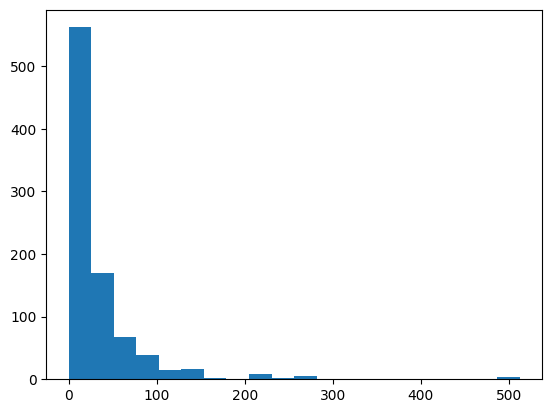

In [20]:
plt.hist(df['Fare'],bins=20)

# Min Max scaling 

* it scales the data between 0 to 1 usually

* lowest become 0 and highest become 1 

X_scaled=(X-X.min)/(X.max-X.min)

* used in KNN , CNN , Neural Networks, where distance or gradient is invovled
* helpful when differnt scales are involved


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [22]:
X_train.head()

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167


In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


In [24]:
import seaborn as sns

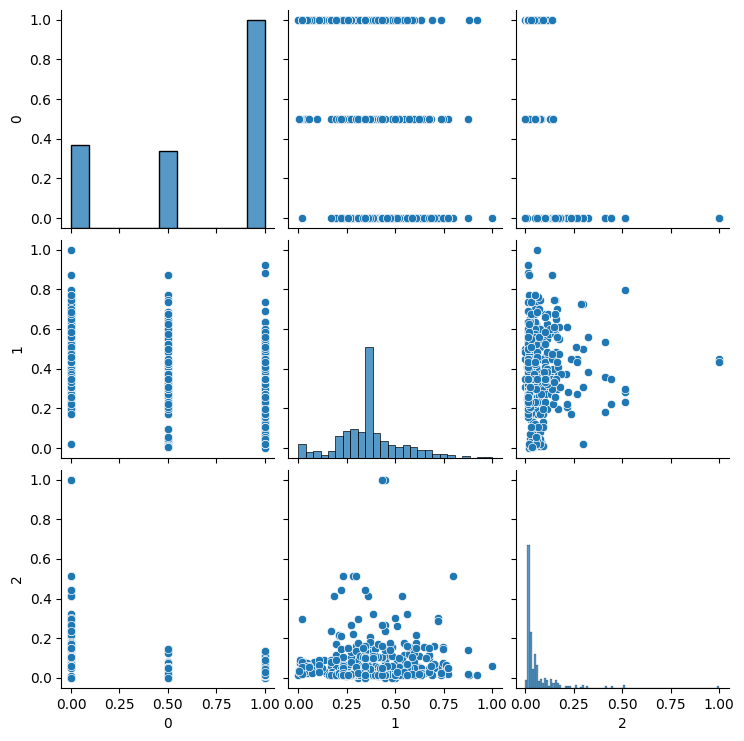

In [25]:
sns.pairplot(df_minmax)

# Robust Scaler

* use median and interquartile range for scaling
* IQR = 3rd quartile - 1st quartile (ie range between 25th and 75th percentiles)

* it centres data around median and scales how 50 % of middle values spread out are

* used when we have to remove outliners

X_scaled=(X-X.median)/IQR

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [27]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [28]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

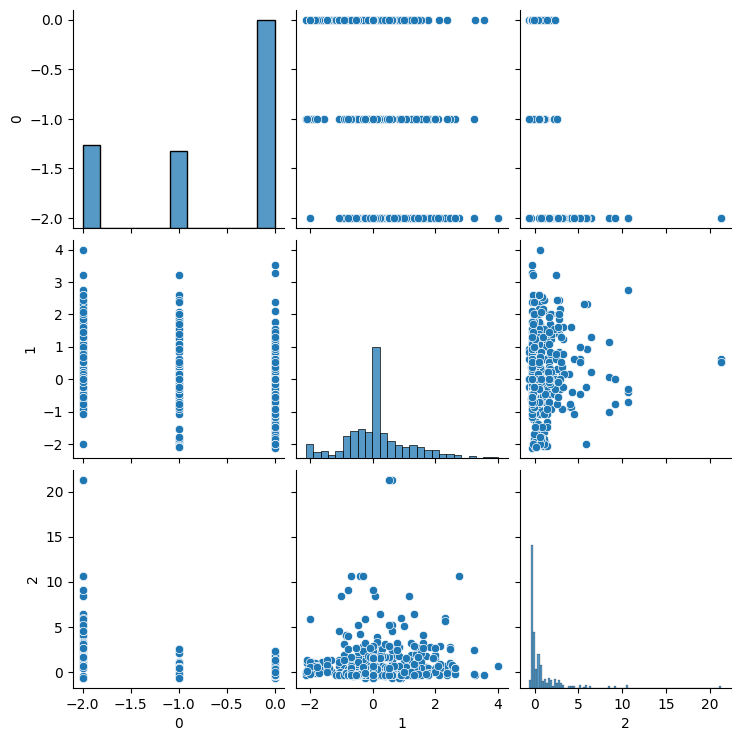

In [29]:
sns.pairplot(df_robust_scaler)

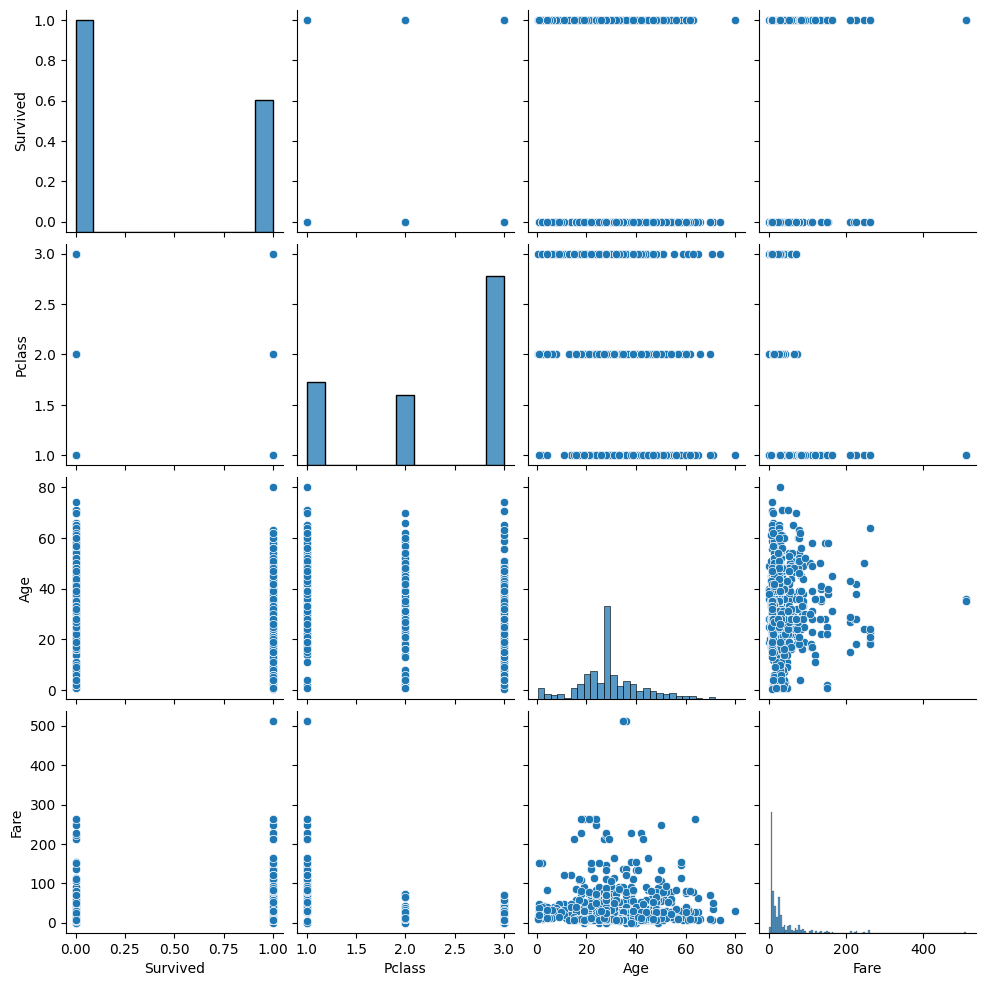

In [30]:
sns.pairplot(df)

# Gaussian Transformation

* when we want normally distributed data that bell shaped
* model like linear regression and nureal network work best when have noramll ditributed data
* it removes outlieer and reduce skewness

--- 

### logarithmic transformation log(x)

when data is rightly skewed like
[1,10,100,1000]

--- 

### reciprocal transformation (1/x)

heavily rightly skewed and works best with +ve and non zer like speed
NOTE- can distort data if values near zero

--- 

### square root transformation (√x)

when moderately rightly skewed
 used for count events, ir no times that hapened like customer complaint

--- 


### Exponential Transformation (x², x³, etc.)
data is left skwed and and u wanna strech out higher values

--- 


### Box-Cot transformation

when have +ve values and we want automatic way to find best transforamtion
automatic find (labda) value and make noramall skewed data

T(Y)=(Y exp(λ)-1)/λ
where Y is the response variable and λtransformation parameter.
λ varies from -5 to 5. 
in transformation all values of λ are considered and optimal value for given variable is selected

In [33]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [36]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [39]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [40]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

If we want to check weather feature is gaussian or normal distributed


Q-Q plot

In [41]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

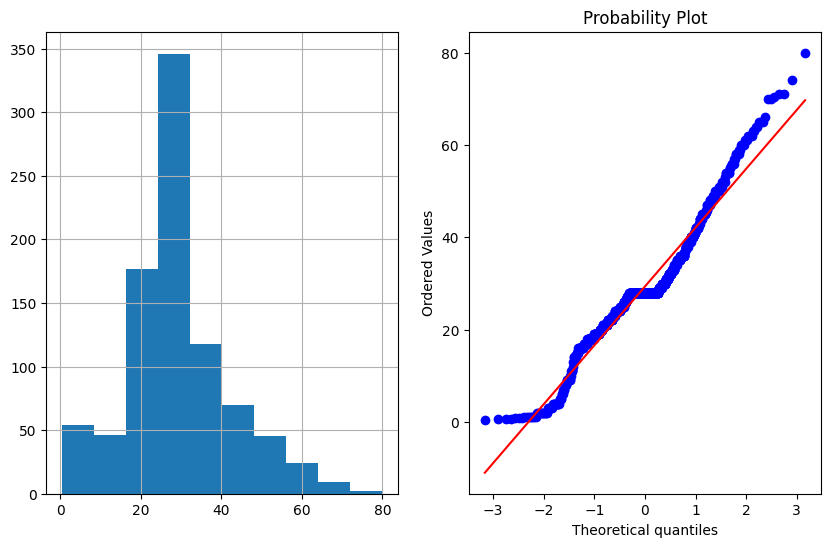

In [42]:
plot_data(df,'Age')

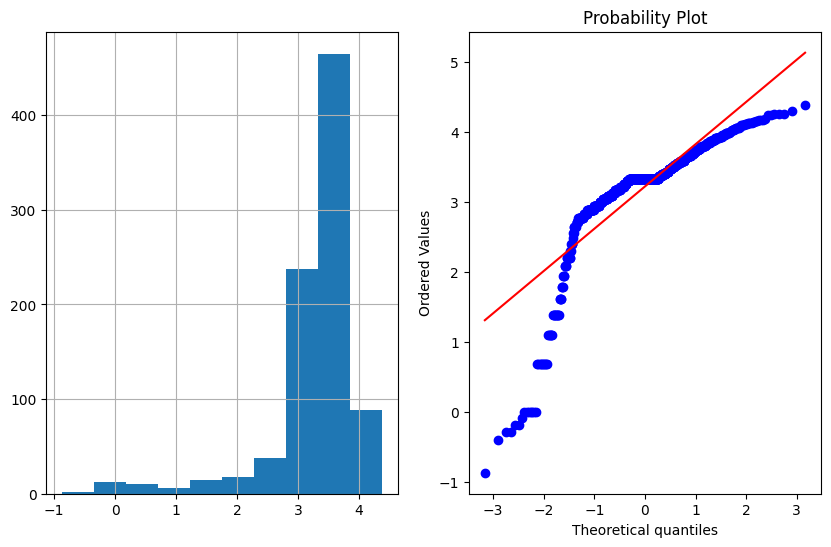

In [43]:
# Logarithmic Transformation
import numpy as np 
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

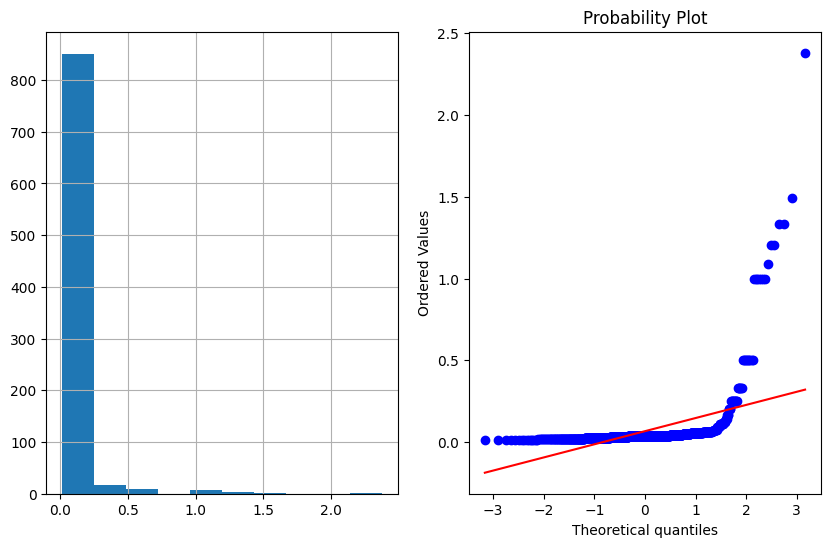

In [44]:
# Reciprocal transformation

df['Age_reciprocal']=1/df.Age 
plot_data(df,'Age_reciprocal')

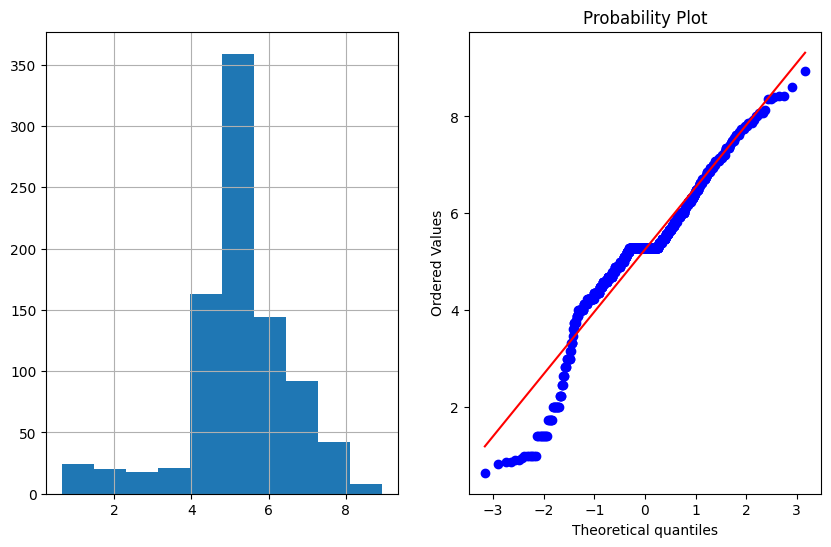

In [45]:
# Square Root Transformation
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

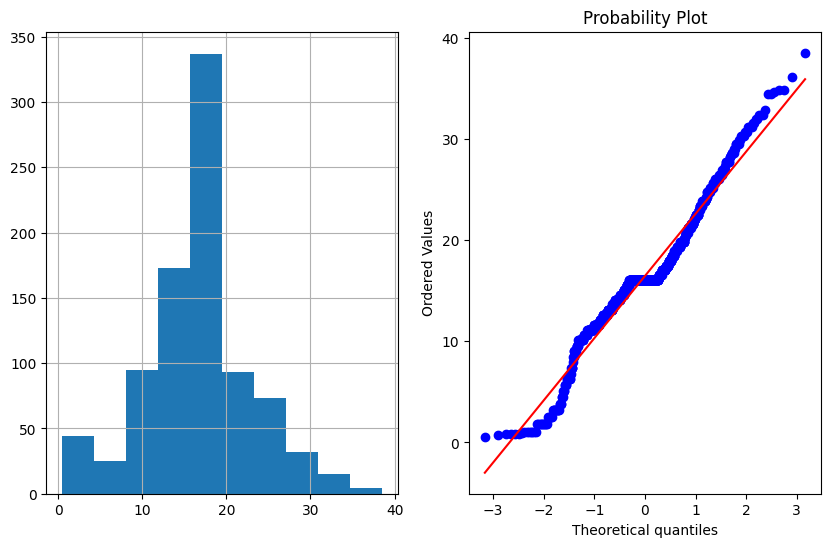

In [47]:
# Exponential transforamation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

In [48]:
# BoxCOx Transformation

df["Age_Boxcox"],parameter=stat.boxcox(df['Age'])

In [49]:
print(parameter)

0.796453129010849


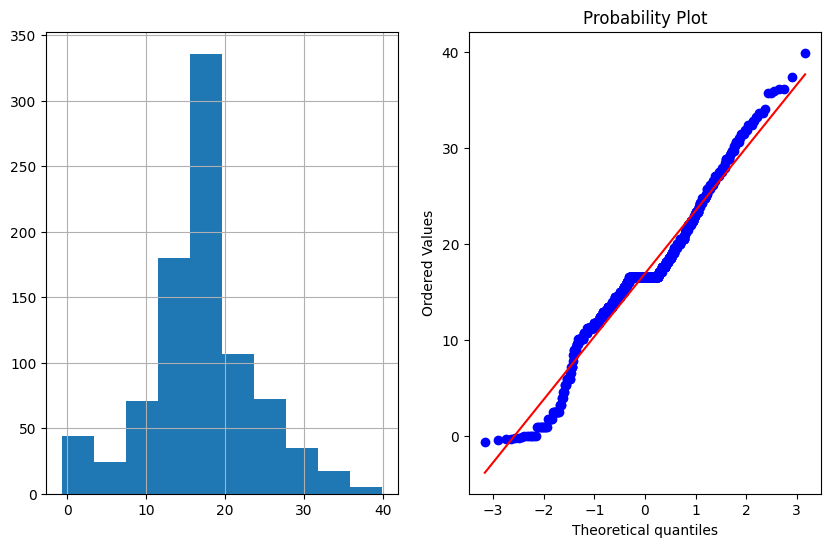

In [50]:
plot_data(df,'Age_Boxcox')